# CSCI4022 Homework 1; Review

## Due Friday, January 28 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Problem 1 (Numerics... kind of; 11 points)
***
####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


1a: $2(1_{add} + 2_{multiplication})=6$

1b: (n + n-1) * cols? $3(3_{multiplications}+2_{add}) = 15$


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


We expect a resultant matrix of nx1, therefore we would only do one operation per row.

mults per row: n, adds per row: n-1(addition comes in pairs), for each row: n

n(2n-1) = $2n^2 -n$

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

We expect a resultant matrix of $nxn$, therefore we would do $(n+n-1)$ operations per element.

We would need to do this $n^2$ times(we have an $nxn$ matrix and we operate over every element)

Therefore we do it $n^2(n+n-1) = 2n^3 - n^2$ times.

$2(10^4)^3 - (10^4)^2 = 2*10^7-10^6$ operations(tens of millions!)


## Problem 2 (Visualizations and Dimension Reduction; 17 points)
***


The Zeiss Xradia x-ray microscope (XRM) that lives in the basement of engineering is a pretty cool device that forms 3-dimensional reconstructions of scanned objects by bombaring them with light and recording the resulting intensity/light interference of the resulting object.  As one stage in processing, each object is reduced into a large number of "voxels" and their resulting intensities.  In this problem we take a reduced set of data of this form and convert the "voxels" into point locations (in micrometers) and visualize the results.

The University of Colorado Museum of Natural History is currently using the XRM to catalogue and save some of their artifacts, as well as allow for the possibility of 3-D digital printings and reconstructions.  We've been given access to some of their data!

The following should load in the data, make it an `np.array` instead of a data frame, and create a **projection**, where data from one dimension is entirely exluded.  In this case, we're taking all of the "Z" values that were in third column of `mat` and "projecting" them onto the X-Y plane for a nice and easy-to-see scatter plot.

Clearly these aren't random points, but what **is** this thing?

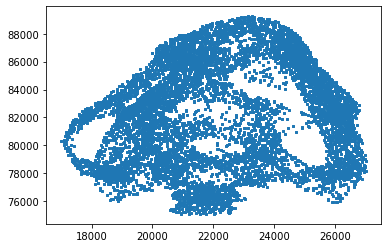

In [3]:
dat=pd.read_csv('../data/xrm_10k.csv', encoding='UTF-8')
mat=np.array(dat[['X','Y','Z']])
plt.scatter(mat[:,0],mat[:,1], 5, marker=',')

**Part A**:  Create scatter plot projections of the given point cloud onto the other two cartesian axis (the XZ and YZ planes).

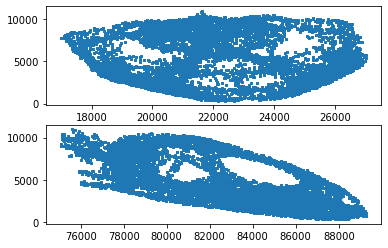

In [4]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(mat[:,0],mat[:,2], 5, marker=',')
ax[1].scatter(mat[:,1],mat[:,2], 5, marker=',')

**Part B**:  It's a little silly to be constrained by the orientation of the object in the XRM itself, since there's no concrete meaning to the X, Y, and Z of the object.  We might ask ourselves if there's a way to re-orient the object and view it form an angle that makes it more clear what it is.

To this end we can employ a **rotation matrix**, code for which is given below.  It uses the aeronautical terms associated with aircraft, which can be hard to understand for a lay person.  Create a small visualization using scatter plots that you believe demonstrate the exact effects of *pitch*, *yaw*, and *roll*.  See also: [wiki](https://en.wikipedia.org/wiki/Aircraft_principal_axes).

**Hint:** You're free to take your own approach here, but I recommend picking one of the 3 projections and then applying a small "rotation" of e.g. 0 pitch, 0 roll, and 30 degree yaw (**What's that in radians?**).  The side-by-side plots of before and after the rotation might show what yaw is, with an accompanying sentence.

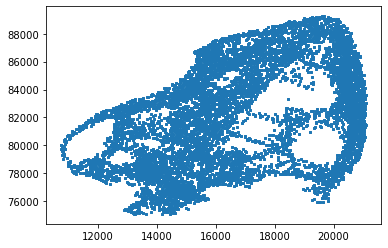

In [5]:
def rotate(mat, yaw, pitch, roll):
    r_mat=[[np.cos(yaw)*np.cos(pitch), \
            np.cos(yaw)*np.sin(pitch)*np.sin(roll)- np.sin(yaw)*np.cos(roll),\
            np.cos(yaw)*np.sin(pitch)*np.cos(roll)+np.sin(yaw)*np.sin(roll) ],\
           [np.sin(yaw)*np.cos(pitch), \
            np.sin(yaw)*np.sin(pitch)*np.sin(roll)+ np.cos(yaw)*np.cos(roll),\
            np.sin(yaw)*np.sin(pitch)*np.cos(roll)-np.cos(yaw)*np.sin(roll) ],\
           [-np.sin(pitch), \
            np.cos(pitch)*np.sin(roll),\
            np.cos(pitch)*np.cos(roll)]
          ]
    return np.matmul(mat, r_mat)

rotated=rotate(mat, 0, 30*np.pi/180, 0)
plt.scatter(rotated[:,0],rotated[:,1], 5, marker=',')

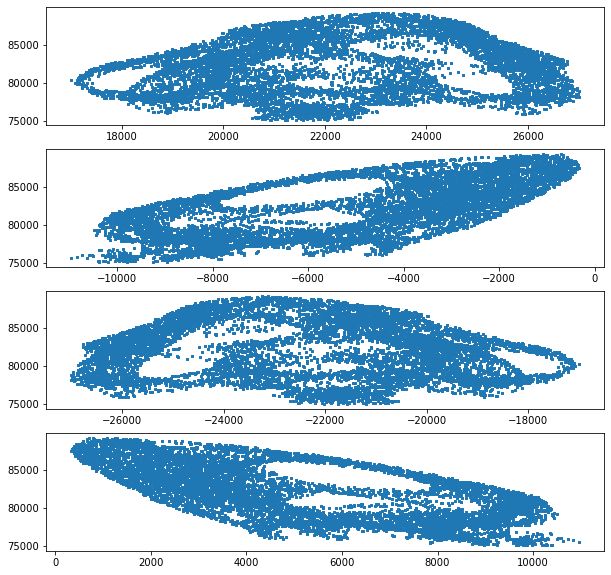

In [6]:
rotations = [0, 90*np.pi/180, np.pi, 270*np.pi/180]
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(4,1)
for x in range(0, 4):
    rotated=rotate(mat, 0, rotations[x], 0)
    ax[x].scatter(rotated[:,0],rotated[:,1], 5, marker=',')

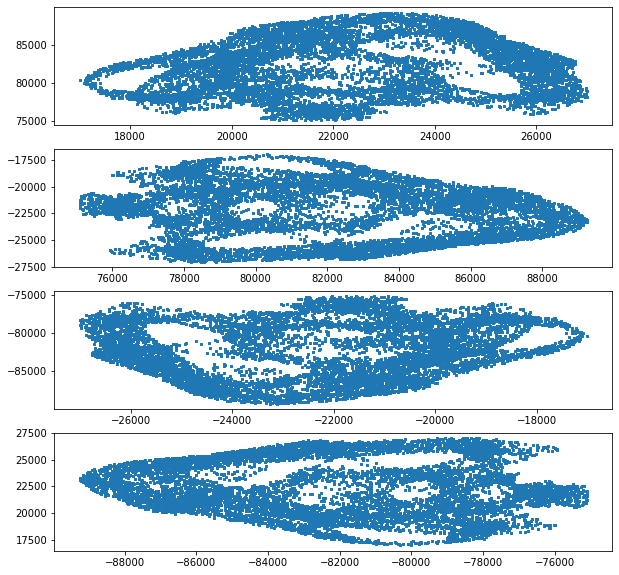

In [7]:
rotations = [0, 90*np.pi/180, np.pi, 270*np.pi/180]
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(4,1)
for x in range(0, 4):
    rotated=rotate(mat, rotations[x], 0, 0)
    ax[x].scatter(rotated[:,0],rotated[:,1], 5, marker=',')

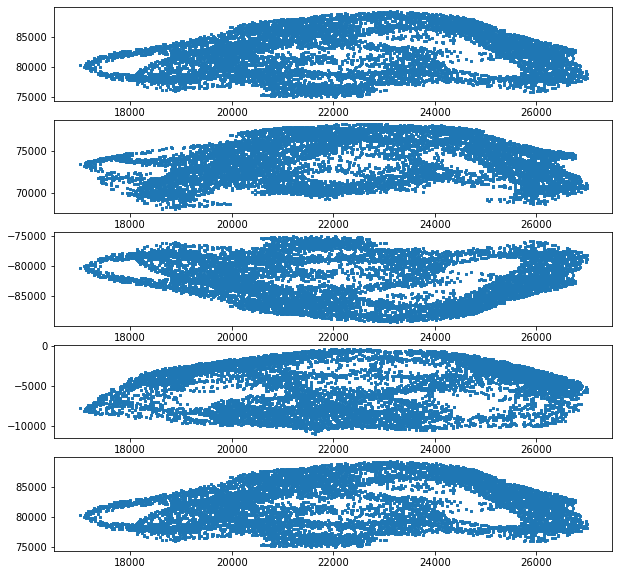

In [8]:
rotations = [0, 30*np.pi/180, np.pi, 270*np.pi/180, 2*np.pi]
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(5,1)
for x in range(0, 5):
    rotated=rotate(mat, 0, 0, rotations[x])
    ax[x].scatter(rotated[:,0],rotated[:,1], 5, marker=',')

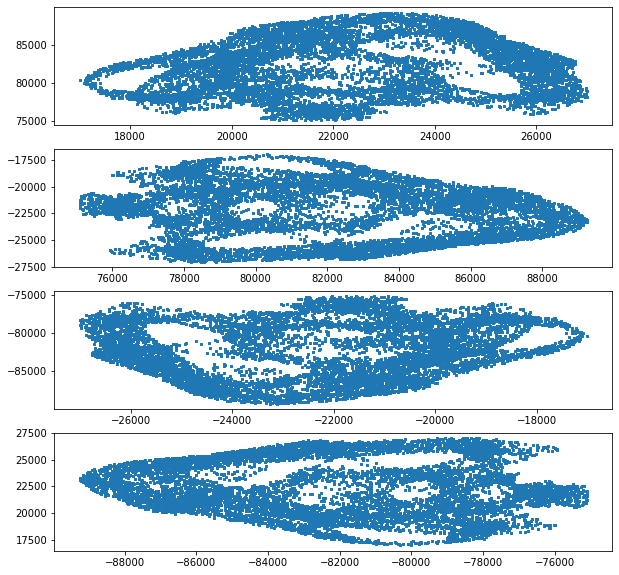

In [9]:
#see if the yaw
rotations = [0, 90*np.pi/180, np.pi, 270*np.pi/180]
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(4,1)
for x in range(0, 4):
    rotated=rotate(mat, rotations[x], 0, 0)
    ax[x].scatter(rotated[:,0],rotated[:,1], 5, marker=',')

yaw -> rotating it around both x and y axis(0 vs np.pi -> same as running with pitch & roll)

pitch -> rotating left to right/right to left(around the y-axis)

roll ->  rotating around the x-axis

**Part C**:  A common goal in Data Science might be to come up with the "best" rotation out of all the possible ways.  To this end we will perform the following exercise:

1) Consider rotations where pitch, yaw, and roll are all values taken from the list [0, 30, 60, 90, 120, 150].  For **all $6^3$ such rotations**, create a rotated data set and project it onto the X-Y plane (columns 0 and 1).  You don't need to plot this projection.  Instead, compute some statistics from it.

2) For each data set in 1), find the ones with the following properties, and plot their post-rotation X-Y projections:

    A) The data set with the smallest minimum-area rectangle necessary to fit the entire object on the XY plane.
    B) The data set with the largest minimum-area rectangle necessary to fit the entire object on the XY plane.
    C) The data set with the largest difference between it's x-dimension range and y-dimension length.
    
Each of the calculations in 2 should be manageable predominantly with calls to `np.min` and `np.max`.

In [10]:
list_vals = [0,30,60,90,120,150]
min_bounding, max_bounding, largest_diff = float("inf"), 0, 0
min_e, max_e, diff_e = None, None, None
#minimum area rectangle means xmin, xmax, ymin, ymax -> corresponds to our 4 points of the bounding box?
def bounding_box(x,y):
    
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    
    width, length = ymax-ymin, xmax-xmin
    #area of box is just ymax-ymin(this is the width of the box.)*xmax-xmin(length of the box.)
    rectangle_area, diff = width*length, length-width
    
    return rectangle_area, diff
#6^3 means o(n^3)
for x in list_vals:
    for y in list_vals:
        for z in list_vals:
            rotated=rotate(mat,x,y,z)
            rectangle_area, diff = bounding_box(rotated[:,0],rotated[:,1])
            #have to drop some conditionals down cuz i need the indices
            print(rectangle_area)
            if rectangle_area < min_bounding:
                min_bounding = rectangle_area
                min_e = (x,y,z)
            if rectangle_area > max_bounding:
                max_bounding = rectangle_area
                max_e = (x,y,z)
            if diff > largest_diff:
                largest_diff = diff
                diff_e = (x,y,z)      

141509702.93045884
123879396.02454941
116371318.99099594
152730639.30286023
95800378.85144144
168668816.9054231
147412398.65005633
108256527.57748203
138594516.87237704
120922031.35862999
129315788.07784277
136797656.64002815
146828998.23584408
95672787.91973728
167527946.40753764
88334402.84499468
172433331.70397085
97698838.71715388
148183402.41337913
106773782.97369175
160109597.6678333
106061994.95417152
158361272.05489078
114911021.51082672
146706393.7217184
117228751.74323052
130071767.08091995
136253955.49991122
116477763.52181296
156234438.30387396
145855803.0680813
118039891.75916776
126707678.50383742
141434192.53338024
112428510.61250128
161550237.88849536
138758772.22933725
151655822.0428496
138212217.3723683
154595414.80519056
142184414.07832995
153945160.69382724
123953870.91030587
156497423.37494645
131160785.23024058
150489470.20219624
153552924.03297397
136962107.1813769
116518932.9732271
153128754.27970064
126861224.65816738
136215614.75105822
141015844.7686863
122352

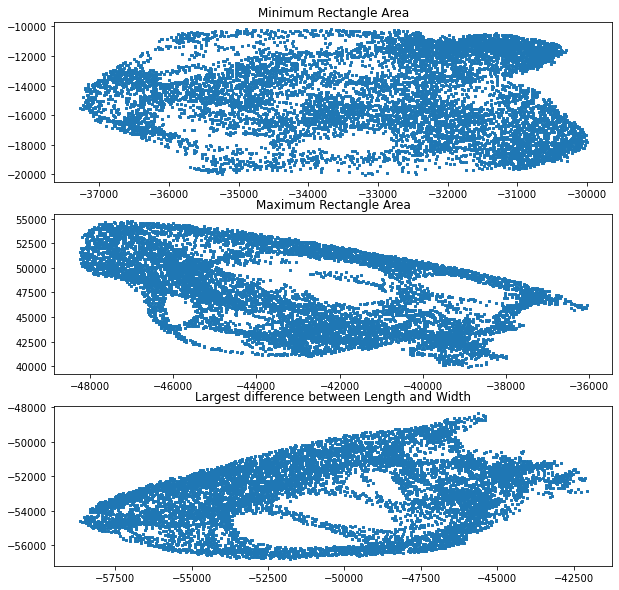

In [11]:
things = [min_e, max_e, diff_e]
titles = ["Minimum Rectangle Area", "Maximum Rectangle Area", "Largest difference between Length and Width"]
fig, ax = plt.subplots(3, 1) #plotting the three with these features!
plt.rcParams["figure.figsize"] = (10,10)
for x in range(0,3):
    rotated = rotate(mat,*things[x])
    ax[x].scatter(rotated[:,0],rotated[:,1], 5, marker=',')
    ax[x].set_title(titles[x])

**Part D**: Can you tell what the object actually is?  Are the measures in **Part C** actually good choices of "best" projections, or can you think of some others?  You may describe the features that you think make for a good projection in words.

I have no clue what the object is. It looks like a skull of some kind. The measures in part C are good choices here. Having both the largest bounded box and smallest bounded box show a few particular angles of the image. I think the best projection would be one that focuses on stretching out the original image into a much larger projection(maintaining the proportions, somewhat like stretching a jpeg out.), rather than one that shifts the angle of rotation, however not completely sure what the best way is. 


## Problem 3 (Hypothesis Simulation; 17 points)
***
One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

Suppose our goal is to outperform a very naive self-driving vehicle. This vehicle is so simple that its motion is entirely random!  The goal is for both our self-driving "car" and the comparison "random" car is to make it from the starting location in the bottom left in Cartesian coordiantes (0,0) and make it to the end goal at (5,2).

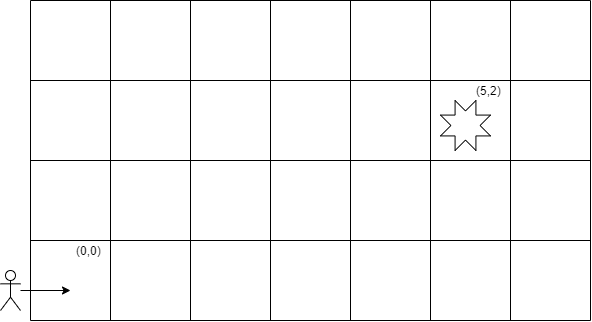

Movement for the "random" car occurs under the following rules:
- Each time step, the car will attempt to choose a direction to move out of (up, down, left, right)
- It will choose to move the **same** direction as its prior motion exactly 50% of the time
- It will choose to turn left or right exactly 25% of the time, each.
- If a movement chosen would result in it leaving the 7x4 region shown, it will choose again from the same options and probabilities until a valid movement is chosen.

The car is done moving as soon as it enters the square at (5,2).  It starts at (0,0), and moves as though its prior move was to the right.

**Part A**: Needless to say, this car isn't very smart.  Simulate 10,000 "journies" of this randomly moving car, saving both how many movements were required to reach (5,2). You may use any syntax/API you want, but one option is loosely outlines below.

In [11]:
#mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=E.  Makes for a nice way to estimate probs.
cartesian_directions=np.array([(0,1), (1,0), (0,-1), (-1,0)])

def move(location, previous_direction):
    while 1:
        x = np.random.randint(low=0, high=4)
        if x == 0 or x == 1:
            new_direction = previous_direction
        elif x == 2:
            #left if prev == right/left, right if prev == up/down
            new_direction = (previous_direction[1], previous_direction[0])
        elif x == 3:
            #right if prev == right/left, left if prev == up/down
            new_direction = (-previous_direction[1], -previous_direction[0])
        new_location = (location[0]+new_direction[0], location[1]+new_direction[1])
        
        if new_location[0] > 6 or new_location[0] < 0 or new_location[1] < 0 or new_location[1] > 3:
            continue
        else:
            return new_location, new_direction

def journey(initial_location, initial_direction, goal_location):
    loc, direc, moves = initial_location, initial_direction, 0

    while loc != goal_location:
        loc, direc = move(loc, direc)
        moves += 1
    return moves

In [12]:
moves = np.empty([10000])
initial_location, initial_direction, goal_location = (0,0), (1,0), (5,2) 
for x in range(0, 10000):
    i = journey(initial_location, initial_direction, goal_location)
    moves[x] = i

**Part B**: Create a density histogram of the number of movements.  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

(array([3.063e+03, 1.503e+03, 1.097e+03, 9.730e+02, 6.830e+02, 5.730e+02,
        4.260e+02, 3.620e+02, 2.820e+02, 2.170e+02, 1.810e+02, 1.290e+02,
        1.100e+02, 8.900e+01, 6.500e+01, 5.000e+01, 4.600e+01, 2.300e+01,
        2.200e+01, 2.500e+01, 2.200e+01, 1.000e+01, 1.000e+01, 1.000e+01,
        6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 1.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  7. ,  13.2,  19.4,  25.6,  31.8,  38. ,  44.2,  50.4,  56.6,
         62.8,  69. ,  75.2,  81.4,  87.6,  93.8, 100. , 106.2, 112.4,
        118.6, 124.8, 131. , 137.2, 143.4, 149.6, 155.8, 162. , 168.2,
        174.4, 180.6, 186.8, 193. , 199.2, 205.4, 211.6, 217.8, 224. ,
        230.2, 236.4, 242.6, 248.8, 255. , 261.2, 267.4, 273.6, 279.8,
        286. , 292.2,

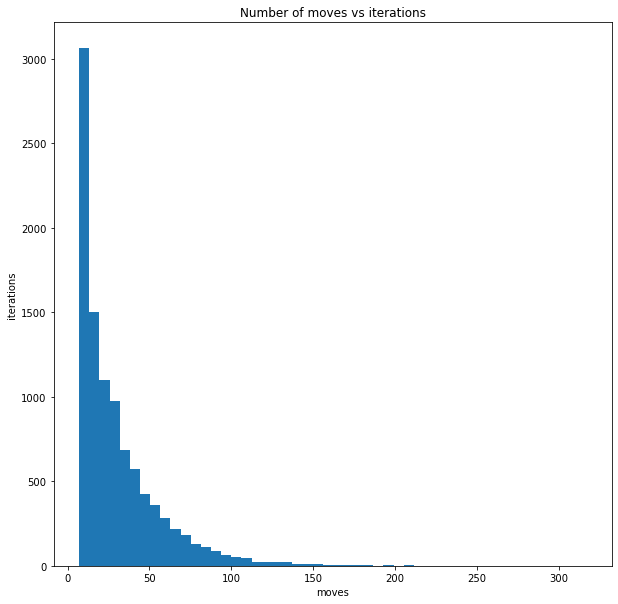

In [13]:
fig, ax = plt.subplots(1,1)

ax.set_title("Number of moves vs iterations")
ax.set_xlabel("moves")
ax.set_ylabel("iterations")

ax.hist(moves, bins=50)

This doesn't look normally distributed. This would matter as we would be able to do many more statistical tests and models on our data if it was normally distributed.(?)

**Part C**: You and your team design a new car, and thankfully it uses a **different** algorithm to determine how and where to move.  Unfortunately, you don't get a sample size of 10,000 samples from your car, since it actually drives on a small track.  You drive it on a similar grid to the above 10 times, and find that over those 10 times your car averaged 16 moves, and also had a median of 17 moves.  Is this demonstrably better than the car you simulated in parts **A** and **B**?  Answer with the following prompts:

**C1**: What is your estimated probability that a single trip of the "random" car takes 16 moves or less?

**C2**: What would you estimate the probability to be that an **average** number of movements over 10 trips is 16 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that my car of the same quality as the random car if a set of 10 trials has an average number of movements less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .04 or less?

**C4**: Would your results in parts **C1**-**C3** change it all if we compared the *medians* instead of the *means* of your car versus the "random" car?

**C5**: What can you safely (with statistical rigor!) tell people about your new car?

In [14]:
n, counter = 10000, 0 
occ = moves <= 16
print(f"The estimated probability of a single trip taking 16 moves or less is {occ.sum()/n}")

lteq_16 = 0
#simulate picking 10 values that mean is less than or eq to 16 -> this provides an estimation
for x in range(n):
    vals = np.random.choice(moves, 10)
    #pick 10 random values from our simulation and take the mean. This represents a single trial.
    mean = np.sum(vals)/10
    if mean <= 16: lteq_16 += 1
    
print(f"The probability of ten trips having an average number of movements of 16 or less is: {lteq_16/n}") 

range_of_c = [x for x in range(14, 25, 2)]
#our type one error represents when the mean is greater than c. We want a value of lt 0.04
def type1error(iterations, inp_values, c):
    occ = 0
    for x in range(0, iterations):
        vals = np.random.choice(moves, 10)
        mean = np.sum(vals)/10
        if mean <= c: occ += 1
    return occ/iterations

type1prob = []
for x in range_of_c:
    type1prob.append([x, type1error(10000, moves, x)])
print(type1prob)

The estimated probability of a single trip taking 16 moves or less is 0.3607
The probability of ten trips having an average number of movements of 16 or less is: 0.0141
[[14, 0.0039], [16, 0.013], [18, 0.0368], [20, 0.0774], [22, 0.1405], [24, 0.2288]]


C3:

$H_{O}$: Our car is of the same quality as the random car.

Reject $H_{O}$: Find c value s.t. a set of 10 trials averages less than or equal to c moves

Type 1 Error -> Corresponds to when we reject the null hypothesis however the null hypothesis is true. We can calculate this value by running a simulation with different c values and picking a value that minimizes the probability of c moves or less over 10 trials to 0.04.

We find that less the probability of falsely rejecting the null hypothesis would be less than 0.04 with a c value of less than or equal to 18.

C4: 

Comparing medians would likely change answer 2/3 as we would take the median value over 10 trials. It would be a better term for comparison as the distribution of the random car is positively skewed(the median will ignore outliers within the dataset, I've highlighted a couple of the offenders below). This would likely require us to choose a lower value of c, as our median would be lower than the mean. 

C5: 

We could state that there is a probability of 0.0116 that the random car is of the same quality as our car over 10 trials. We could remark that is unlikely that the random car is of the same quality as our new car. 

In [15]:
indices = np.argsort(moves)
stri = ""
for x in range(1,4):
    stri += " " + str(moves[indices[-x]])
print(f"Few ex. - {stri}")

Few ex. -  317.0 229.0 213.0
